# Pandas
Les outils que nous avons vu pour l'instant nous permettent pas directment de traiter des bases de données (on pourrait s'en sortir d'une facon ou d'une autre bien sur). Alors nous passons à pandas, une libraries puissante pour tous ce qui est traitement de base de données.

In [1]:
import pandas as pd # la convention pour l'importer
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [6]:
zip?

In [2]:
# nom de bébé et la frequence du nom
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
gender = ['M', 'F', 'F', 'M', 'F']

In [3]:
BabyDataSet = list(zip(names,births, gender))
BabyDataSet # ça resemble à un dictionnaire ! liste de tuple

[('Bob', 968, 'M'),
 ('Jessica', 155, 'F'),
 ('Mary', 77, 'F'),
 ('John', 578, 'M'),
 ('Mel', 973, 'F')]

In [4]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births', 'Gender'])
df # voilà notre premier dataframe

,Names,Births,Gender
0,Bob,968,M
1,Jessica,155,F
2,Mary,77,F
3,John,578,M
4,Mel,973,F


In [5]:
df.to_csv('births1880.csv',index=False,header=False)

In [7]:
os.listdir(os.getcwd()) # vous retrouvez le fichiers ? essayer de l'ouvrir avec excel par exemple 

['inflammation-01.csv',
 'bonjour_string.pkl',
 '1_numpy.ipynb',
 'deux_histogrammes_moches.pdf',
 'housing_data',
 'births1880.csv',
 'titanic_data',
 'deux_histogrammes_moches.eps',
 '3_scipy.ipynb',
 'deux_histogrammes_moches.png',
 '.git',
 'pima-indians-diabetes.csv',
 '0_intro_rappel_python.ipynb',
 'deux_histogrammes_moches.jpeg',
 '7_data_science_competition_a_la_kaggle.ipynb',
 'module1.pyc',
 '6_sklearn.ipynb',
 'module1.py',
 '2_matplotlib.ipynb',
 '.ipynb_checkpoints',
 '4_pandas.ipynb',
 'deux_histogrammes_moches.jpg',
 '5_seaborn.ipynb',
 'README.md']

In [17]:
Location = os.getcwd()+'/births1880.csv'
df = pd.read_csv(Location, names=['Names', 'Births', 'Gender']) # qu'est ce qui se passe si on énleve names ? 

In [18]:
df

,Names,Births,Gender
0,Bob,968,M
1,Jessica,155,F
2,Mary,77,F
3,John,578,M
4,Mel,973,F


In [9]:
df.dtypes # les types des colonnes

Names     object
Births     int64
Gender    object
dtype: object

In [10]:
df.Names

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [12]:
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [117]:
df.Births.dtype # on affiche le type des données stockées dans la colonnes

dtype('int64')

In [118]:
df.Births.values # et on obtient un array numpy

array([968, 155,  77, 578, 973])

The most popular name


,Names,Births,Gender
4,Mel,973,F


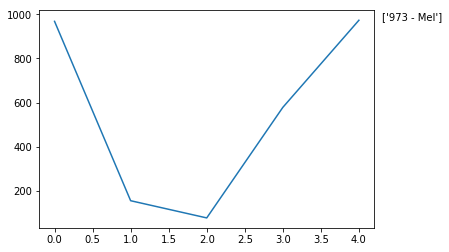

In [20]:
# on genère facilement des graphes
df['Births'].plot()

# pour trouver la valeur maximale
MaxValue = df['Births'].max()

# la nom associé au max
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# le texte qu'on va ajouter au graph
Text = str(MaxValue) + " - " + MaxName

# on ajoute le texte sur le plot
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]

Souvent on a envie d'extraire des statistique de résumé de la base. Par exemple la moyenne par groupe, les nombre d'occurence etc.. Pandas a beaucoup de méthodes implementer qui permettent de faire ceci.

In [22]:
print df.Gender.value_counts()
# on résume les occurence du genre
print df.Gender.value_counts(normalize=True)



F    3
M    2
Name: Gender, dtype: int64
F    0.6
M    0.4
Name: Gender, dtype: float64


Quel est le max au sein des filles et des garcon ? 

In [124]:
df.groupby('Gender').max()

,Names,Births
Gender,,
F,Mel,973
M,John,968


## Le "chaining"
On peut facilement appliquer les méthodes par chaine

            Births
Gender            
F       401.666667
M       773.000000


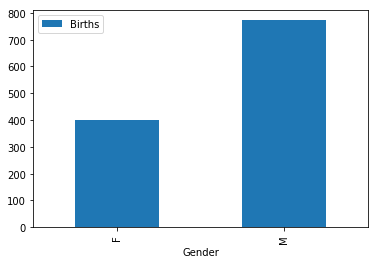

In [24]:
print df.groupby('Gender').mean()
df.groupby('Gender').mean().plot.bar()

On passe à un jeu de données plus grand : le dataset pima indians. 
Ce jeu de données indiques la présence du diabetes dans une population d'invidu. 
Voici la description des colonnes: 

    0. Number of times pregnant.
    1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    2. Diastolic blood pressure (mm Hg).
    3. Triceps skinfold thickness (mm).
    4. 2-Hour serum insulin (mu U/ml).
    5. Body mass index (weight in kg/(height in m)^2).
    6. Diabetes pedigree function.
    7. Age (years).
    8. Class variable (0 or 1).

On s'interesse à prédire la variable 8. 
Dans le jeu de données il y a des valeurs manquantes qu'on cherche à identifier et on s'interesse à la question comment traiter des variables manquantes ? 

In [32]:
dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [33]:
print(dataset.head(20))

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


On observe que dans les colonnes 1-5 il y  a des valuers de 0 (le min vaut 0). Ceci n'a pas de sense et nous considerons ces valeur alors comme manquante

In [34]:
print((dataset[[1,2,3,4,5]] == 0).sum())
# il y a pas mal de valeurs manquante !!

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [39]:
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.NaN)
#dataset[[1,2,3,4,5]].replace(0, np.NaN, inplace=True)
# on a remplacé les valeurs par NaN, 
# attention, dans la colonne 0 on veut garder les valeurs 0 (pourqoui?)

In [40]:
print(dataset.head(20))
print(dataset.describe()) # on a ignoré les valeurs manquantes dans la description

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

In [41]:
# on compte les valeurs manquantes 
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


Maintenant qu'on a identifié toutes les valeurs manquantes on doit décider comment les traiters. 
On peut distinguer grosso modo trois stratégies différentes : 
    1. On supprime la colonnes ou la lighen qui contient les valeurs manqutes. (Pourriez vous dire ce que cela aura comme effet? ) 
    2. On traites les valeurs manquantes appart (le fait qu'une valeure manquate peut associé à une characteristique de l'individu)
    3. On utilise des stratégies d'imputation (par moyenne, médianne, valeur plus frequentes...)

In [42]:
#dataset.dropna(inplace=True) # quel serait l'effet de cette commande ? 
dataset_reduced = dataset.dropna()

In [43]:
print dataset.shape
print dataset_reduced.shape # on a perdu la moitié (!!!!) des observations

(768, 9)
(392, 9)


In [44]:
#dataset.fillna(dataset.mean(), inplace=True) # quel resultat ici ? 
dataset_imputed = dataset.fillna(dataset.mean() )

In [45]:
print(dataset_imputed.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [46]:
print(dataset_imputed.head(20))

     0      1          2         3           4          5      6   7  8
0    6  148.0  72.000000  35.00000  155.548223  33.600000  0.627  50  1
1    1   85.0  66.000000  29.00000  155.548223  26.600000  0.351  31  0
2    8  183.0  64.000000  29.15342  155.548223  23.300000  0.672  32  1
3    1   89.0  66.000000  23.00000   94.000000  28.100000  0.167  21  0
4    0  137.0  40.000000  35.00000  168.000000  43.100000  2.288  33  1
5    5  116.0  74.000000  29.15342  155.548223  25.600000  0.201  30  0
6    3   78.0  50.000000  32.00000   88.000000  31.000000  0.248  26  1
7   10  115.0  72.405184  29.15342  155.548223  35.300000  0.134  29  0
8    2  197.0  70.000000  45.00000  543.000000  30.500000  0.158  53  1
9    8  125.0  96.000000  29.15342  155.548223  32.457464  0.232  54  1
10   4  110.0  92.000000  29.15342  155.548223  37.600000  0.191  30  0
11  10  168.0  74.000000  29.15342  155.548223  38.000000  0.537  34  1
12  10  139.0  80.000000  29.15342  155.548223  27.100000  1.441

In [47]:
dataset.loc[:,1:7].corr() # pourriez vous expliquer cette commande ? 

,1,2,3,4,5,6,7
1,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136
2,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107
3,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816
4,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261
5,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841
6,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561
7,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000


In [48]:
dataset_imputed.columns = ['num_pregnant', 'glucose', 'pressure', 'tricep', 'insulin', 'bmi', 'pedigree' , 'age', 'diab_class']


In [52]:
dataset_imputed.head()

,num_pregnant,glucose,pressure,tricep,insulin,bmi,pedigree,age,diab_class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [53]:
dataset_imputed.diab_class = dataset_imputed.diab_class.astype(str)

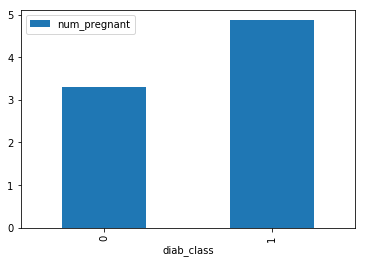

In [54]:
dataset_imputed[['num_pregnant', 'diab_class']].groupby('diab_class').mean().plot.bar()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

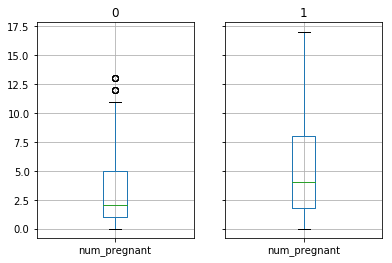

In [55]:
dataset_imputed[['num_pregnant', 'diab_class']].groupby('diab_class').boxplot()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

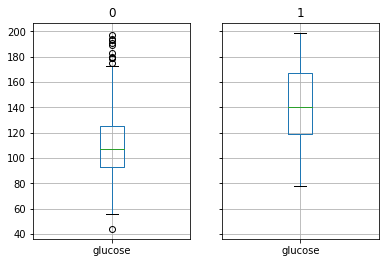

In [56]:
dataset_imputed[['glucose', 'diab_class']].groupby('diab_class').boxplot()

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

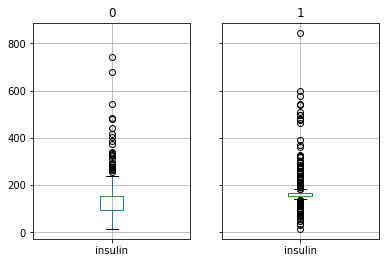

In [57]:
dataset_imputed[['insulin', 'diab_class']].groupby('diab_class').boxplot()

Il est souvent nécessaire de recoder nos variable. Nous allons le faire ici en transformant la variable age dans une variable nomée 'classe d'age' avec trois modalités:
    1. 'jeunes' : age <= 30
    2. 'moyens' :  30 < age <= 60
    3. 'agés' : 60 < age
Ensuite on transformera les données en dummy

In [60]:
dataset_imputed['class_dage'] = ''

In [62]:
dataset_imputed['class_dage'][dataset_imputed.age<=30] = 'jeunes'
dataset_imputed['class_dage'][(30<dataset_imputed.age) & (dataset_imputed.age<=60)] = 'moyens'
dataset_imputed['class_dage'][60<dataset_imputed.age] = 'agés'

/home/alex/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/alex/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/alex/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [64]:
dataset_imputed.head()

,num_pregnant,glucose,pressure,tricep,insulin,bmi,pedigree,age,diab_class,class_dage
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,moyens
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,moyens
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,moyens
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,jeunes
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,moyens


In [65]:
dataset_imputed.class_dage.value_counts()

jeunes    417
moyens    324
agés       27
Name: class_dage, dtype: int64

In [66]:
dummies = pd.get_dummies(dataset_imputed.class_dage)
dummies

,agés,jeunes,moyens
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,0,1
9,0,0,1


In [68]:
dataset_dummies = pd.concat([dataset_imputed, dummies], axis=1)
dataset_dummies.drop(['class_dage'], axis=1, inplace=True)
dataset_dummies.head()

,num_pregnant,glucose,pressure,tricep,insulin,bmi,pedigree,age,diab_class,agés,jeunes,moyens
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,0,0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0,0,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0,0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0,1,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0,0,1


# Exercise: 
Vous trouvez dans ce dossier un dossier qui s'appelle titanic_data. C'est un jeu de données sur les passagers du titanic. 
    1. Chargez le fichiers train.csv avec pandas
    2. Afficher les données. Quelles sont les informations dans la base et de quel type sont-ils ?
    3. Combien des valeurs manquantes y a t il ? 
    4. Quel est la moyenne d'age des personnes qui ont survecu ? Parmi les hommes et les femmes ?
    5. Quel nombre de passagers sont morts par 'Pclass' ? Quelle conclusion en tirer ?
    6. Faites un boxplot groupé en fonction du fait de survivire et le prix. 
    

Add join/ merge to the titanic dataset